Bank Customer Segmentation
Most banks have a large customer base - with different characteristics in terms of age, income, values, lifestyle, and more. Customer segmentation is the process of dividing a customer dataset into specific groups based on shared traits.

According to a report from Ernst & Young, “A more granular understanding of consumers is no longer a nice-to-have item, but a strategic and competitive imperative for banking providers. Customer understanding should be a living, breathing part of everyday business, with insights underpinning the full range of banking operations.

About this Dataset
This dataset consists of 1 Million+ transaction by over 800K customers for a bank in India. The data contains information such as - customer age (DOB), location, gender, account balance at the time of the transaction, transaction details, transaction amount, etc.

Interesting Analysis Ideas
The dataset can be used for different analysis, example -

Perform Clustering / Segmentation on the dataset and identify popular customer groups along with their definitions/rules
Perform Location-wise analysis to identify regional trends in India
Perform transaction-related analysis to identify interesting trends that can be used by a bank to improve / optimi their user experiences
Customer Recency, Frequency, Monetary analysis
Network analysis or Graph analysis of customer data.

## **1. 라이브러리, 데이터 불러오기**

In [61]:
#기본 라이브러리
import numpy as np
import pandas as pd
import os
import time

#시각화 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)


#그래프 스타일 서식 지정
plt.style.use('default')
#그래프 한글 폰트
from matplotlib import font_manager, rc
plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)

#사이킷런
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, RocCurveDisplay
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, plot_importance

from sklearn.model_selection import KFold # K-validation

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#차원축소
from sklearn.decomposition import PCA

#군집
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#회귀
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from xgboost import XGBRegressor # XGBoost Regressor 모델
from lightgbm import LGBMRegressor # XGBoost Regressor 모델

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
#from statsmodels.multivariate.pca import PCA as stats_PCA  # sklearn 의 PCA와 겹치지 않도록 별칭 지정
#from statsmodels.multivariate.pca import pca as stats_pca




In [62]:
bank_df = pd.read_csv('data/6주차/bank_transactions.csv')
bank_df.head(50)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


## **2. EDA**

In [63]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


### **2-1. 결측치 제거**

In [64]:
df = bank_df.copy()

In [65]:
# 컬럼별 결측치 개수
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [66]:
df = df.dropna(axis=0)

# 컬럼별 결측치 개수
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041614 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 79.5+ MB


In [68]:
numeric_col = [col for col in df if df[col].dtype != "object" ]
object_col = [col for col in df if df[col].dtype == "object" ]

### **2-3. Object data EDA**

In [69]:
object_col

['TransactionID',
 'CustomerID',
 'CustomerDOB',
 'CustGender',
 'CustLocation',
 'TransactionDate']

In [70]:
# TransactionID, CustomerID 삭제
df = df.drop("TransactionID", axis = 1)
df = df.drop("CustomerID", axis = 1)
df = df.drop("TransactionDate", axis = 1)

In [71]:
df["CustomerDOB"].value_counts()

1/1/1800    56292
1/1/89        809
1/1/90        784
6/8/91        698
1/1/91        665
            ...  
2/12/51         1
20/3/52         1
26/9/47         1
4/10/41         1
24/10/44        1
Name: CustomerDOB, Length: 17233, dtype: int64

???????????????

In [72]:
df = df.drop("CustomerDOB", axis = 1)

In [73]:
df.CustGender.value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

In [74]:
df[df.CustGender == 'T'].index

Int64Index([959987], dtype='int64')

In [75]:
df = df.drop([959987], axis=0)

In [76]:
df.CustGender.value_counts()

M    760978
F    280635
Name: CustGender, dtype: int64

In [77]:
df["CustLocation"].value_counts()

MUMBAI                            101997
NEW DELHI                          84143
BANGALORE                          81330
GURGAON                            73594
DELHI                              70549
                                   ...  
DISTRICT PURI                          1
DHAKOLA                                1
KANDESHWAR STATION NAVI MUMBAI         1
HOSHIAR PUR                            1
IMPERIA THANE WEST                     1
Name: CustLocation, Length: 9275, dtype: int64

In [78]:
df["CustLocation"]

0             JAMSHEDPUR
1                JHAJJAR
2                 MUMBAI
3                 MUMBAI
4            NAVI MUMBAI
               ...      
1048562        NEW DELHI
1048563           NASHIK
1048564        HYDERABAD
1048565    VISAKHAPATNAM
1048566             PUNE
Name: CustLocation, Length: 1041613, dtype: object

In [79]:
df["CustLocation"].value_counts().loc[lambda x : x<150].sum()/len(df)

0.09975489937241566

In [80]:
counts = df["CustLocation"].value_counts()
df_149 = df[df["CustLocation"].map(counts)>149]

In [81]:
df_149.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937707 entries, 0 to 1048566
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CustGender               937707 non-null  object 
 1   CustLocation             937707 non-null  object 
 2   CustAccountBalance       937707 non-null  float64
 3   TransactionTime          937707 non-null  int64  
 4   TransactionAmount (INR)  937707 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 42.9+ MB


In [82]:
object_col = [col for col in df if df[col].dtype == "object" ]

In [83]:
object_col

['CustGender', 'CustLocation']

In [84]:
label = LabelEncoder()

for col in object_col:
    df[col] = pd.DataFrame(label.fit_transform(df[col]))
df[object_col].head()

,CustGender,CustLocation
0,0.0,3557.0
1,1.0,3618.0
2,0.0,5219.0
3,0.0,5219.0
4,0.0,5606.0


In [85]:
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
0,0.0,3557.0,17819.05,143207,25.0
1,1.0,3618.0,2270.69,141858,27999.0
2,0.0,5219.0,17874.44,142712,459.0
3,0.0,5219.0,866503.21,142714,2060.0
4,0.0,5606.0,6714.43,181156,1762.5


### **2-4. Numeric data EDA**

In [86]:
numeric_col

['CustAccountBalance', 'TransactionTime', 'TransactionAmount (INR)']

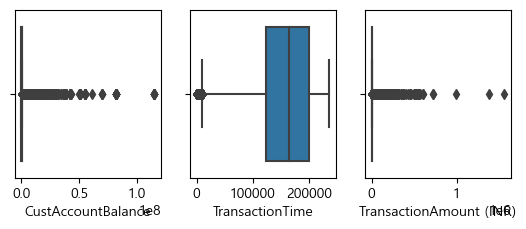

In [87]:
for i in range(0, len(numeric_col)):
    plt.subplot(2, 3, i+1) 
    sns.boxplot(df[numeric_col].iloc[:, i])

In [88]:
df = df.drop("TransactionTime", axis = 1)

In [89]:
df["CustAccountBalance"]

0           17819.05
1            2270.69
2           17874.44
3          866503.21
4            6714.43
             ...    
1048562      7635.19
1048563     27311.42
1048564    221757.06
1048565     10117.87
1048566     75734.42
Name: CustAccountBalance, Length: 1041613, dtype: float64

In [90]:
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR)
0,0.0,3557.0,17819.05,25.0
1,1.0,3618.0,2270.69,27999.0
2,0.0,5219.0,17874.44,459.0
3,0.0,5219.0,866503.21,2060.0
4,0.0,5606.0,6714.43,1762.5


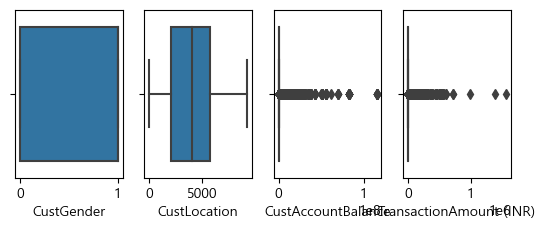

In [91]:
for i in range(0, len(df.columns)):
    plt.subplot(2, 4, i+1) 
    sns.boxplot(df.iloc[:, i])

In [92]:
#df = df.drop("CustLocation", axis = 1)

### **2-5. 정규화**

In [93]:
# 변수 스케일링
rs = RobustScaler()

df_scaled = pd.DataFrame(rs.fit_transform(df), columns=df.columns, index=df.index)

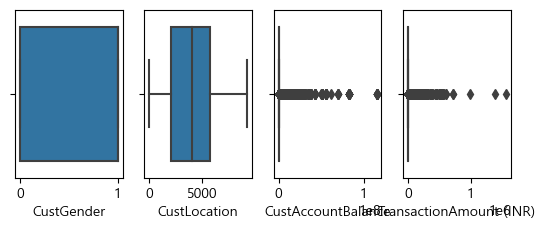

In [94]:
for i in range(0, len(df.columns)):
    plt.subplot(2, 4, i+1) 
    sns.boxplot(df.iloc[:, i])

## **3. 차원축소**

<AxesSubplot:>

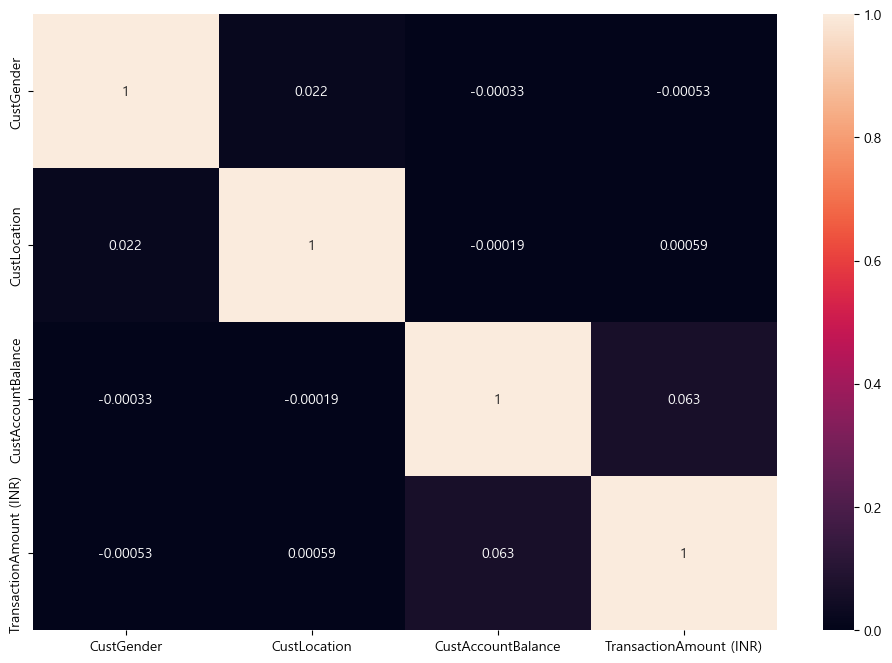

In [95]:
plt.figure(figsize=(12,8))

#plot heat map
sns.heatmap(df_scaled.corr(), annot=True)

In [96]:
# 컬럼별 결측치 개수
df_scaled.isnull().sum()

df_scaled = df_scaled.dropna(axis=0, )

# 컬럼별 결측치 개수
df_scaled.isnull().sum()

CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionAmount (INR)    0
dtype: int64

In [97]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034693 entries, 0 to 1041612
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CustGender               1034693 non-null  float64
 1   CustLocation             1034693 non-null  float64
 2   CustAccountBalance       1034693 non-null  float64
 3   TransactionAmount (INR)  1034693 non-null  float64
dtypes: float64(4)
memory usage: 39.5 MB


In [98]:
# 주성분 개수 설정
k = 2

# 주성분 개수를 k개로 하는 PCA 모델 생성
pca = PCA(n_components=2)

# 표준화된 변수에 대해 PCA 수행
x = pd.DataFrame(pca.fit(df_scaled))

# 주성분 각각의 설명력 및 설명력 비율
pd.DataFrame( {'주성분 별 설명력' : pca.explained_variance_,
               '주성분 별 설명력 비율' : pca.explained_variance_ratio_})

TypeError: __init__() got an unexpected keyword argument 'n_components'

In [99]:
df_pca.corr()

NameError: name 'df_pca' is not defined

In [ ]:
x =df_pca[0]
y =df_pca[1]
z =df_pca[2]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [ ]:
start = time.time() 

kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit(df_pca).predict(df_pca)

score_kmeans_s = silhouette_score(df_pca, labels, metric='euclidean')
print(score_kmeans_s)

# 끝 시간 측정
end = time.time() 

# 끝-시작 시간 print
print('시간 :',end-start,'sec') 

In [ ]:
import sklearn.metrics as metrics
from scipy.spatial.distance import cdist

# plot
def plot_kmeans(kmeans, X, n_clusters=2, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # cluster 중심 값
    centers = kmeans.cluster_centers_

    # 유클리디안(기본값) 거리 계산 / 각 군집의 중심값으로부터 가장 멀리 떨어진 거리
    radii = [cdist(X[labels == i], [center], metric='euclidean').max() for i, center in enumerate(centers)]

    # 군집 중심 및 거리로 plot
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

In [ ]:
plot_kmeans(kmeans, df_pca)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
plot_kmeans(kmeans, df_pca)

In [ ]:
# Silhouette

n_components = np.arange(2, 21)
models = [KMeans(n, random_state=0).fit(df_pca) for n in n_components]

plt.plot(n_components, [silhouette_score(df_pca, m.predict(df_pca), metric='euclidean') for m in models], label = 'silhouette')

plt.legend(loc='best')
plt.xlabel('n_components');